In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [ ]:
df = pd.read_csv('/content/Book1_new.csv')

In [2]:
df.shape

NameError: name 'df' is not defined

In [ ]:
df.head()

,Temperature,Humidity,Yield
0,16.019008,0.706558,75.241872
1,14.034575,0.636516,74.566940
2,16.277304,0.808904,74.920290
3,18.214798,0.615125,76.011689
4,20.142697,0.799629,75.911659


In [ ]:
from sklearn.linear_model import LinearRegression


# Fit linear regression model
X = df.drop(columns=['Yield'])
y = np.random.randint(50, 100, size=len(df))  # Simulate yield with random values for demonstration
regression_model = LinearRegression().fit(X, y)

# Predict yield
predicted_yield = regression_model.predict(X)

# Add predicted yield to DataFrame
df['Yield'] = predicted_yield

# Display DataFrame with predicted yield
print(df)

      Temperature  Humidity      Yield
0       16.019008  0.706558  74.198165
1       14.034575  0.636516  74.287563
2       16.277304  0.808904  73.987381
3       18.214798  0.615125  74.460109
4       20.142697  0.799629  74.124494
...           ...       ...        ...
3097    14.923655  0.808211  73.947785
3098    21.744296  0.679871  74.428912
3099    18.774408  0.685829  74.326061
3100    20.934038  0.752310  74.249586
3101    20.611984  0.772447  74.196797

[3102 rows x 3 columns]


In [ ]:
# Extract 'Yield' column
yield_column = df['Yield']

# Save 'Yield' column to a CSV file
yield_column.to_csv('yield_column.csv', index=False)


In [3]:
data = pd.read_csv('/content/DATA.csv')

In [4]:
data.shape

(3102, 16)

In [5]:
data.head()

,Temperature,Humidity,Solar Radiation,Soil Type,Soil PH,Soil Moisture,Soil Conductivity,Soil Acidity,Soil Organic Carbon Concentration,Sulfur Concentration,Boron Concentration,elevation,rainfall,irrigation,Yield,Potassium concentration
0,16.019008,0.706558,0.575469,Red,7.987621,16.810257,1.030991,7.625053,1.683372,32.748963,46.547437,407.435162,483.411956,47.769584,75.241872,348.944195
1,14.034575,0.636516,0.751767,Loamy,6.601809,16.443110,1.261775,7.310579,1.767012,36.468725,41.341515,399.387598,569.306330,68.411781,74.566940,341.601037
2,16.277304,0.808904,0.570521,Silty,7.129889,17.373210,1.911685,6.659084,1.702206,39.002770,36.252177,397.167650,511.079670,61.937479,74.920290,255.117774
3,18.214798,0.615125,0.759715,Alluvial,7.269808,17.030687,0.803353,6.539721,1.936395,51.771066,46.509768,399.257720,517.287587,50.834155,76.011689,323.007285
4,20.142697,0.799629,0.582743,Red,6.168976,17.479657,1.197110,6.902296,1.993590,36.771336,31.861828,403.446737,497.239997,42.233960,75.911659,291.409079


In [6]:
data = pd.read_csv("SoilData.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'SoilData.csv'

In [ ]:
data.head()

,Temperature,Humidity,Solar Radiation,Soil Type,Soil PH,Soil Moisture,Soil Conductivity,Soil Acidity,Soil Organic Carbon Concentration,Nitrogen Concentration,Phosphorus Concentration,Potassium Concentration,Sulfur Concentration,Boron Concentration,Yield
0,16.019008,0.706558,0.575469,Red,6.133997,14.655450,1.030991,7.671677,1.683372,136.989968,52.033684,307.953223,42.778002,20.411476,74.198165
1,14.034575,0.636516,0.751767,Loamy,6.310072,18.800678,1.261775,7.557132,1.767012,33.728710,38.782042,302.747647,30.405421,62.314854,74.287563
2,16.277304,0.808904,0.570521,Silty,6.106211,14.767593,1.911685,7.442427,1.702206,125.317830,29.725024,267.021184,16.844905,8.513405,73.987381
3,18.214798,0.615125,0.759715,Alluvial,7.647175,11.158573,0.803353,7.944910,1.936395,68.835645,28.266511,278.902962,68.311393,17.641894,74.460109
4,20.142697,0.799629,0.582743,Red,7.606629,17.877961,1.197110,7.429636,1.993590,128.493538,51.186557,298.499240,44.369302,59.986272,74.124494


In [7]:
print(data.columns)

Index(['Temperature', 'Humidity', 'Solar Radiation', 'Soil Type', 'Soil PH',
       'Soil Moisture', 'Soil Conductivity', 'Soil Acidity',
       'Soil Organic Carbon Concentration', 'Sulfur Concentration',
       'Boron Concentration', 'elevation', 'rainfall', 'irrigation', 'Yield',
       'Potassium concentration'],
      dtype='object')


In [8]:
selected_features = ['Temperature', 'Humidity', 'Solar Radiation', 'Soil Type', 'Soil PH',
       'Soil Moisture', 'Soil Conductivity', 'Soil Acidity',
       'Soil Organic Carbon Concentration', 'Sulfur Concentration',
       'Boron Concentration', 'elevation', 'rainfall', 'irrigation',
       'Potassium concentration']
X = data[selected_features]
y = data['Yield']

In [9]:
X_encoded = pd.get_dummies(X, columns=['Soil Type'])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [11]:
#Initializing Regression Models:
svm_regressor = SVR()
lasso_regressor = Lasso()
knn_regressor = KNeighborsRegressor()
rf_regressor = RandomForestRegressor()
gb_regressor = GradientBoostingRegressor()


In [12]:
print(data['Soil Type'].unique())

['Red' 'Loamy' 'Silty' 'Alluvial' 'Sandy' 'Marshy' 'Laterite']


In [13]:
#Training Regression Models:
svm_regressor.fit(X_train, y_train)
lasso_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
rf_regressor.fit(X_train, y_train)
gb_regressor.fit(X_train, y_train)


GradientBoostingRegressor()

In [14]:
# Make predictions
svm_predictions = svm_regressor.predict(X_test)
lasso_predictions = lasso_regressor.predict(X_test)
knn_predictions = knn_regressor.predict(X_test)
rf_predictions = rf_regressor.predict(X_test)
gb_predictions = gb_regressor.predict(X_test)

In [15]:
svm_mse = mean_squared_error(y_test, svm_predictions)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
knn_mse = mean_squared_error(y_test, knn_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
gb_mse = mean_squared_error(y_test, gb_predictions)

svm_mae = mean_absolute_error(y_test, svm_predictions)
lasso_mae = mean_absolute_error(y_test, lasso_predictions)
knn_mae = mean_absolute_error(y_test, knn_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
gb_mae = mean_absolute_error(y_test, gb_predictions)

svm_rmse = np.sqrt(svm_mse)
lasso_rmse = np.sqrt(lasso_mse)
knn_rmse = np.sqrt(knn_mse)
rf_rmse = np.sqrt(rf_mse)
gb_rmse = np.sqrt(gb_mse)

svm_r2 = r2_score(y_test, svm_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
knn_r2 = r2_score(y_test, knn_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
gb_r2 = r2_score(y_test, gb_predictions)
# Print model performance
# Print model performance including RMSE
print("Model Performance:")
print(f"SVM - MSE: {svm_mse}, RMSE: {svm_rmse}, MAE: {svm_mae}, R2 Score: {svm_r2}")
print(f"Lasso - MSE: {lasso_mse}, RMSE: {lasso_rmse}, MAE: {lasso_mae}, R2 Score: {lasso_r2}")
print(f"KNN - MSE: {knn_mse}, RMSE: {knn_rmse}, MAE: {knn_mae}, R2 Score: {knn_r2}")
print(f"Random Forest - MSE: {rf_mse}, RMSE: {rf_rmse}, MAE: {rf_mae}, R2 Score: {rf_r2}")
print(f"Gradient Boosting - MSE: {gb_mse}, RMSE: {gb_rmse}, MAE: {gb_mae}, R2 Score: {gb_r2}")



Model Performance:
SVM - MSE: 1.409355984030616, RMSE: 1.187162998088559, MAE: 0.9693381968932354, R2 Score: 0.001685686133848563
Lasso - MSE: 1.420265626986637, RMSE: 1.1917489781772992, MAE: 0.9717942073421448, R2 Score: -0.00604213625139205
KNN - MSE: 1.648901382065689, RMSE: 1.284095550208663, MAE: 1.031498976328502, R2 Score: -0.16799578709852625
Random Forest - MSE: 0.9934287522217715, RMSE: 0.996708960640854, MAE: 0.8105874607639301, R2 Score: 0.2963068561905361
Gradient Boosting - MSE: 0.9533602911883714, RMSE: 0.9764017058508099, MAE: 0.7893986896965062, R2 Score: 0.324689265345839


In [16]:
svm_accuracy = svm_regressor.score(X_test, y_test) * 100
lasso_accuracy = lasso_regressor.score(X_test, y_test) * 100
knn_accuracy = knn_regressor.score(X_test, y_test) * 100
rf_accuracy = rf_regressor.score(X_test, y_test) * 100
gb_accuracy = gb_regressor.score(X_test, y_test) * 100
print("Accuracy (%):")
print(f"SVM: {svm_accuracy}")
print(f"Lasso: {lasso_accuracy}")
print(f"KNN: {knn_accuracy}")
print(f"Random Forest Accuracy (%): {rf_accuracy}")
print(f"Gradient Boosting Accuracy (%): {gb_accuracy}")



Accuracy (%):
SVM: 0.1685686133848563
Lasso: -0.604213625139205
KNN: -16.799578709852625
Random Forest Accuracy (%): 29.630685619053608
Gradient Boosting Accuracy (%): 32.4689265345839


In [ ]:
svm_accuracy = svm_regressor.score(X_test, y_test) * 100
lasso_accuracy = lasso_regressor.score(X_test, y_test) * 100
knn_accuracy = knn_regressor.score(X_test, y_test) * 100

print("Accuracy (%):")
print(f"SVM: {svm_accuracy}")
print(f"Lasso: {lasso_accuracy}")
print(f"KNN: {knn_accuracy}")


Accuracy (%):
SVM: 40.66771130872296
Lasso: -0.0006958250793998033
KNN: -10.78425132409475


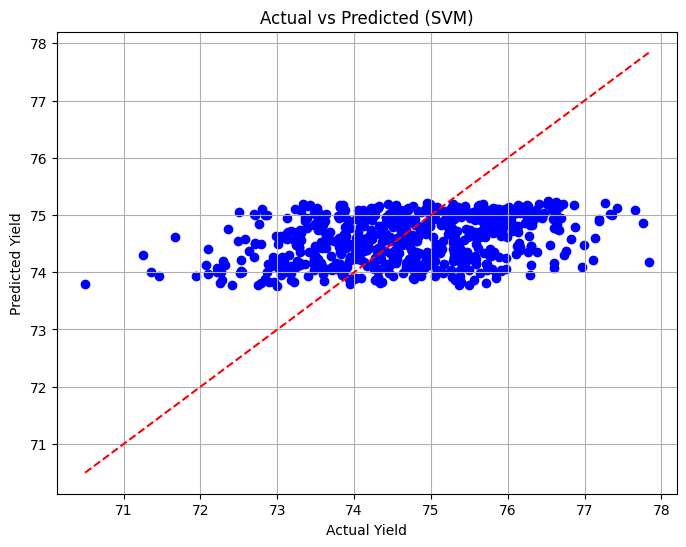

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, svm_predictions, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.title('Actual vs Predicted (SVM)')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.grid(True)
plt.show()

In [ ]:
accuracies = {'SVM': [], 'Lasso': [], 'Decision Tree': [], 'KNN': []}
for soil_type in X['Soil Type'].unique():
    mask = X_test[f"Soil Type_{soil_type}"] == 1
    accuracy_svm = mean_squared_error(y_test[mask], svm_predictions[mask])
    accuracy_lasso = mean_squared_error(y_test[mask], lasso_predictions[mask])
    accuracy_dt = mean_squared_error(y_test[mask], dt_predictions[mask])
    accuracy_knn = mean_squared_error(y_test[mask], knn_predictions[mask])
    accuracies['SVM'].append(accuracy_svm)
    accuracies['Lasso'].append(accuracy_lasso)
    accuracies['Decision Tree'].append(accuracy_dt)
    accuracies['KNN'].append(accuracy_knn)

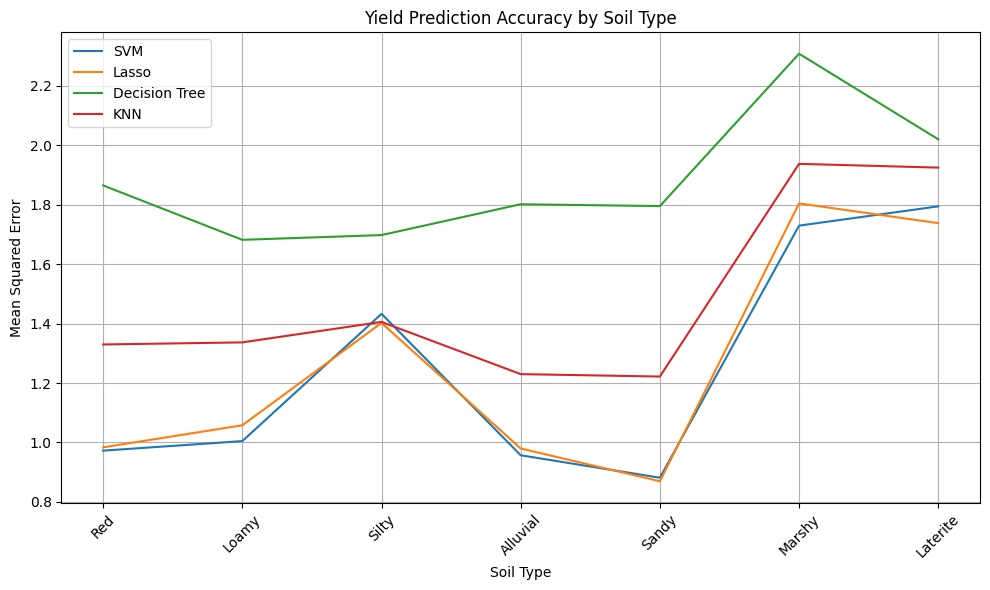

In [ ]:
plt.figure(figsize=(10, 6))
for model, acc in accuracies.items():
    plt.plot(X['Soil Type'].unique(), acc, label=model)

plt.title("Yield Prediction Accuracy by Soil Type")
plt.xlabel("Soil Type")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
models = ['SVM', 'Lasso', 'Decision Tree', 'KNN']
mse = [mean_squared_error(y_test, svm_predictions), mean_squared_error(y_test, lasso_predictions),
       mean_squared_error(y_test, dt_predictions), mean_squared_error(y_test, knn_predictions)]
mae = [mean_absolute_error(y_test, svm_predictions), mean_absolute_error(y_test, lasso_predictions),
       mean_absolute_error(y_test, dt_predictions), mean_absolute_error(y_test, knn_predictions)]
rmse = [np.sqrt(mse[0]), np.sqrt(mse[1]), np.sqrt(mse[2]), np.sqrt(mse[3])]
metrics_df = pd.DataFrame({'Model': models, 'MSE': mse, 'MAE': mae, 'RMSE': rmse})
print(metrics_df)



           Model       MSE       MAE      RMSE
0            SVM  1.266661  0.920720  1.125461
1          Lasso  1.274077  0.923589  1.128750
2  Decision Tree  1.884014  1.100741  1.372594
3            KNN  1.494287  0.986598  1.222410


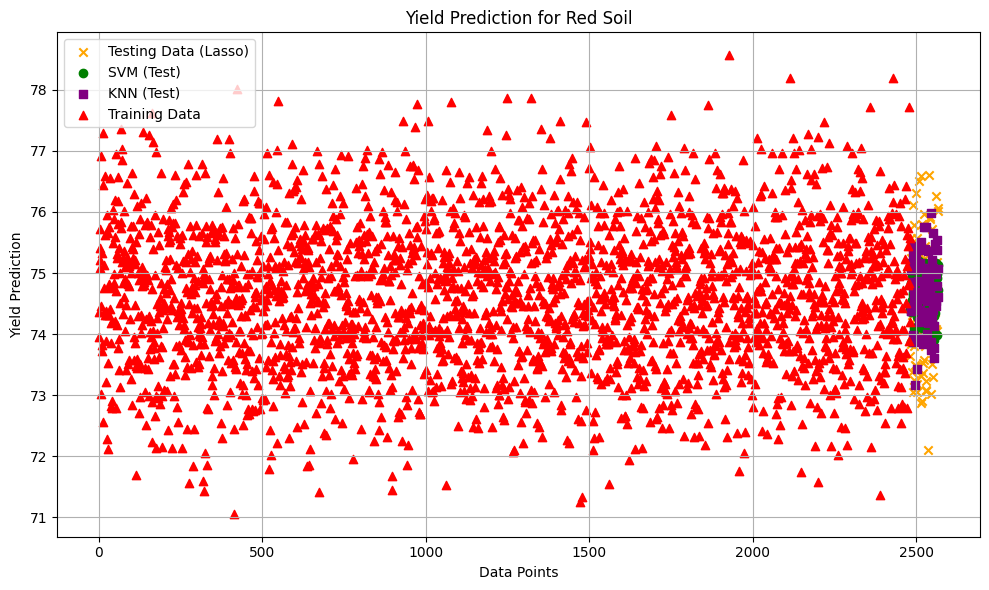

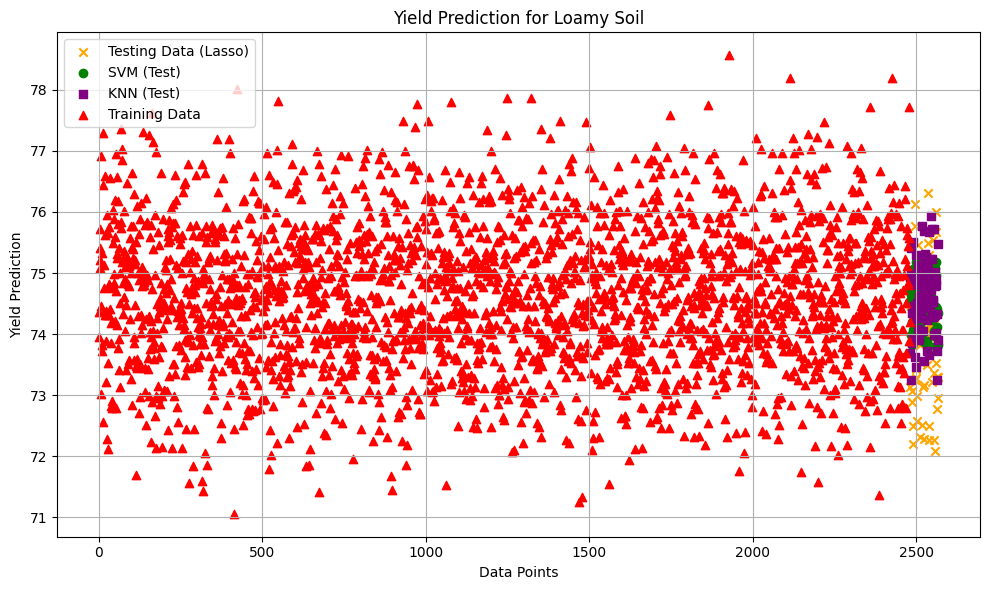

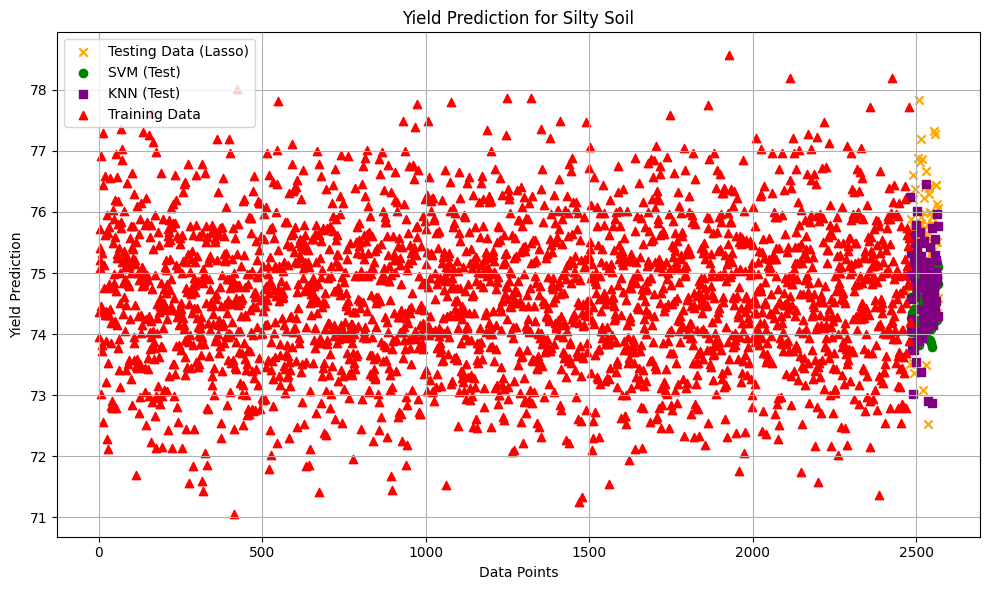

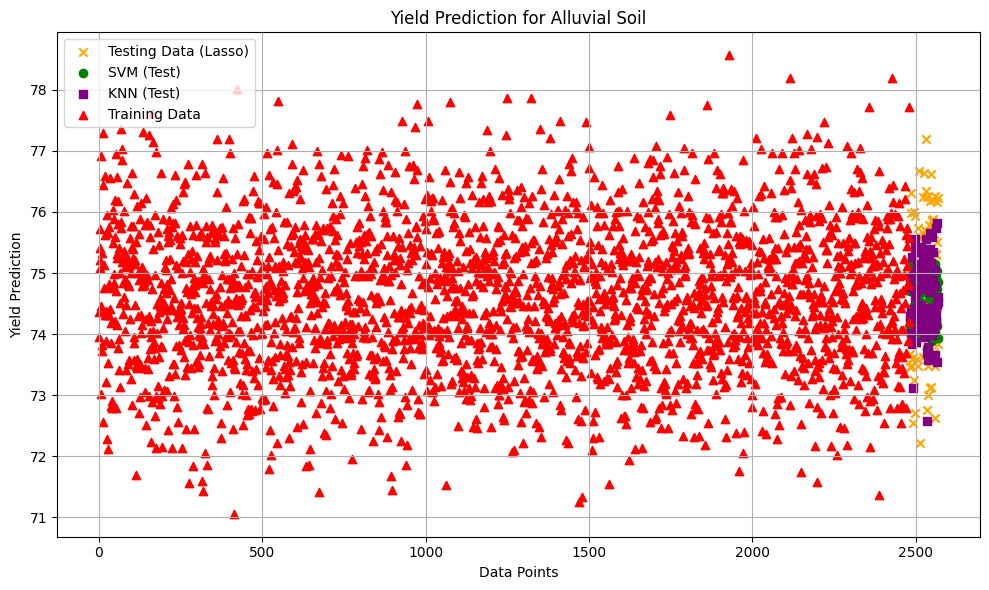

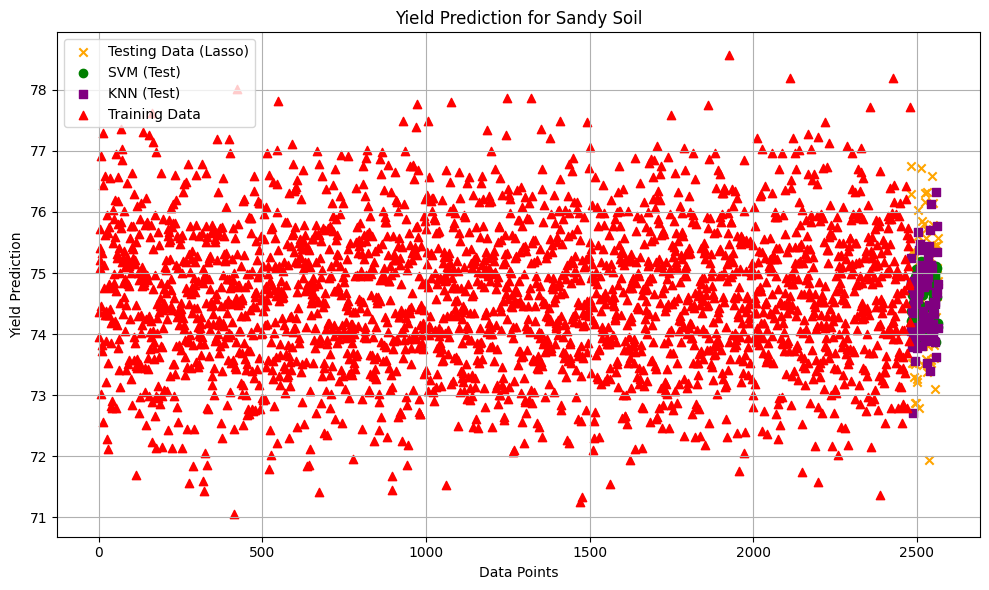

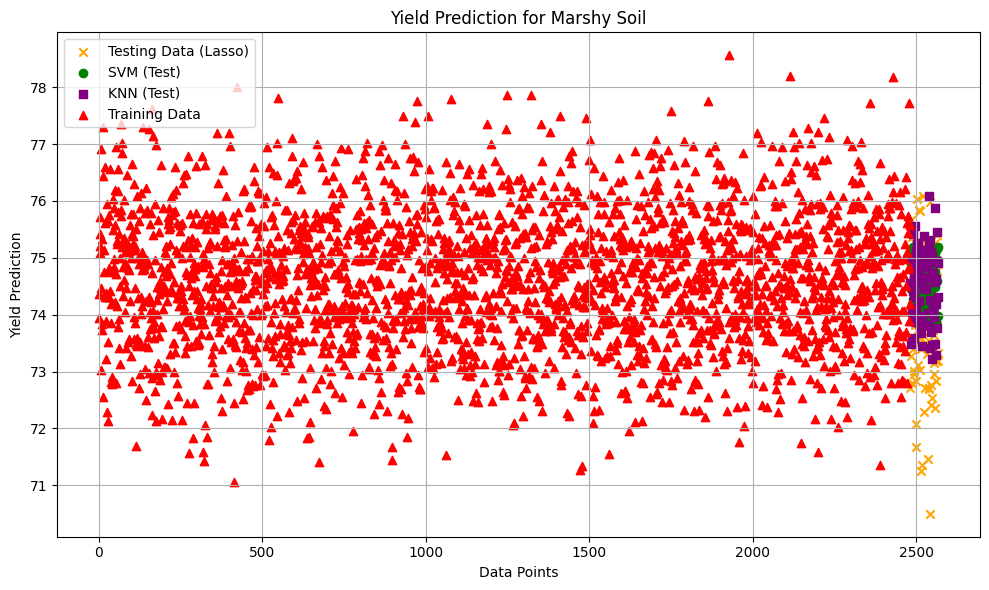

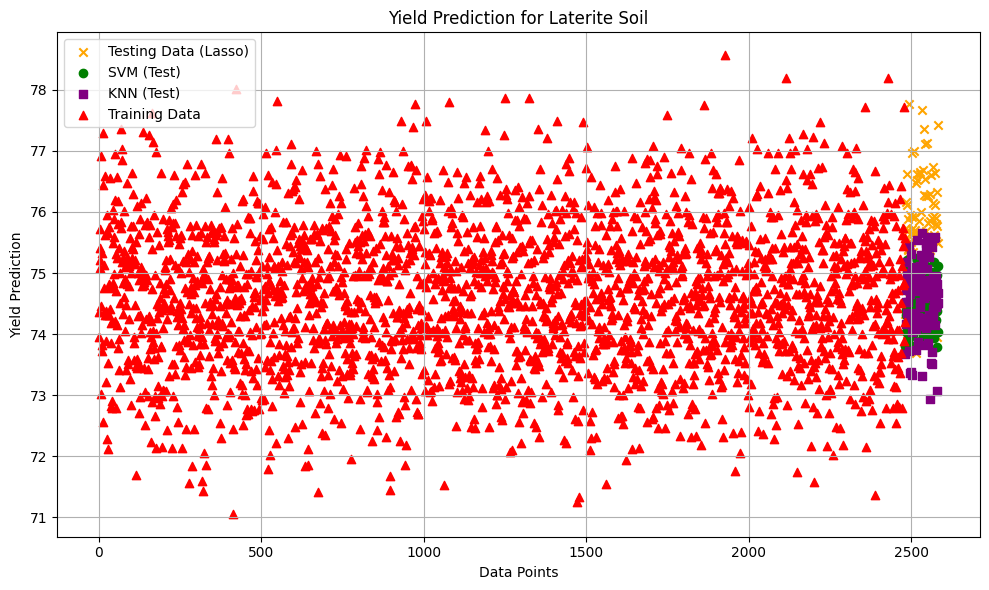

In [ ]:
for soil_type in X['Soil Type'].unique():
    plt.figure(figsize=(10, 6))
    plt.title(f"Yield Prediction for {soil_type} Soil")
    plt.xlabel("Data Points")
    plt.ylabel("Yield Prediction")

    # Plot testing data (Lasso, SVM, KNN)
    mask = X_test[f"Soil Type_{soil_type}"] == 1
    plt.scatter(range(len(y_train), len(y_train) + sum(mask)), y_test[mask], label='Testing Data (Lasso)', color='orange', marker='x')
    plt.scatter(range(len(y_train), len(y_train) + sum(mask)), svm_predictions[mask], label='SVM (Test)', color='green', marker='o')
    plt.scatter(range(len(y_train), len(y_train) + sum(mask)), knn_predictions[mask], label='KNN (Test)', color='purple', marker='s')

    # Plot training data
    plt.scatter(range(len(y_train)), y_train, label='Training Data', color='red', marker='^')

    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
# Evaluate model performance
svm_mse = mean_squared_error(y_test, svm_predictions)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
dt_mse = mean_squared_error(y_test, dt_predictions)
knn_mse = mean_squared_error(y_test, knn_predictions)

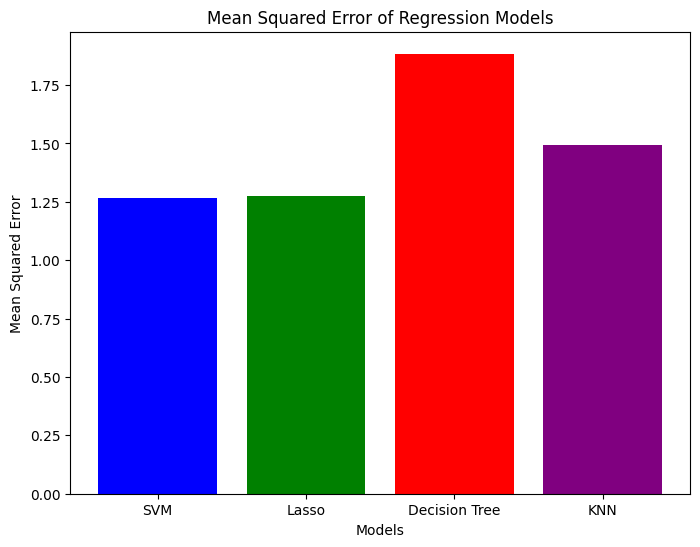

In [ ]:
# Visualize model performance
models = ['SVM', 'Lasso', 'Decision Tree', 'KNN']
mse = [svm_mse, lasso_mse, dt_mse, knn_mse]

plt.figure(figsize=(8, 6))
plt.bar(models, mse, color=['blue', 'green', 'red', 'purple'])
plt.title('Mean Squared Error of Regression Models')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.show()

In [ ]:
print("Mean Squared Error:")
for model, mse in zip(models, mse):
    print(f"{model}: {mse}")

Mean Squared Error:
SVM: 1.2666614564439127
Lasso: 1.2740768067662804
Decision Tree: 1.8840138519431027
KNN: 1.4942871017658537
